In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('housing.csv')
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
dataset['total_bedrooms']=dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean())


<AxesSubplot:>

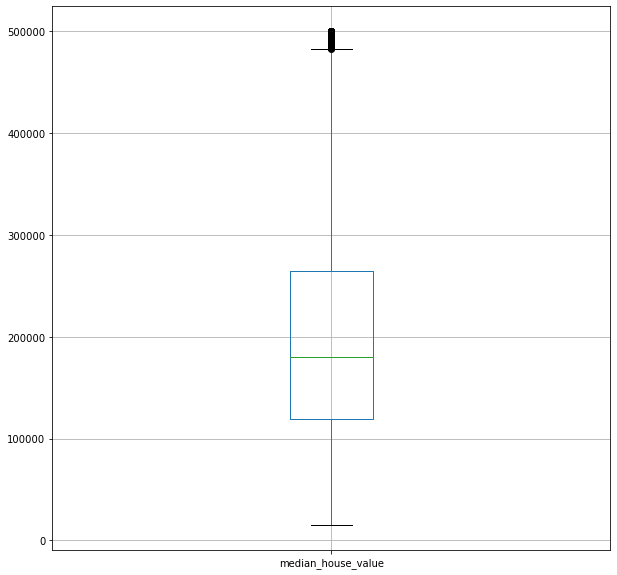

In [6]:
dataset.boxplot(['median_house_value'], figsize=(10, 10))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

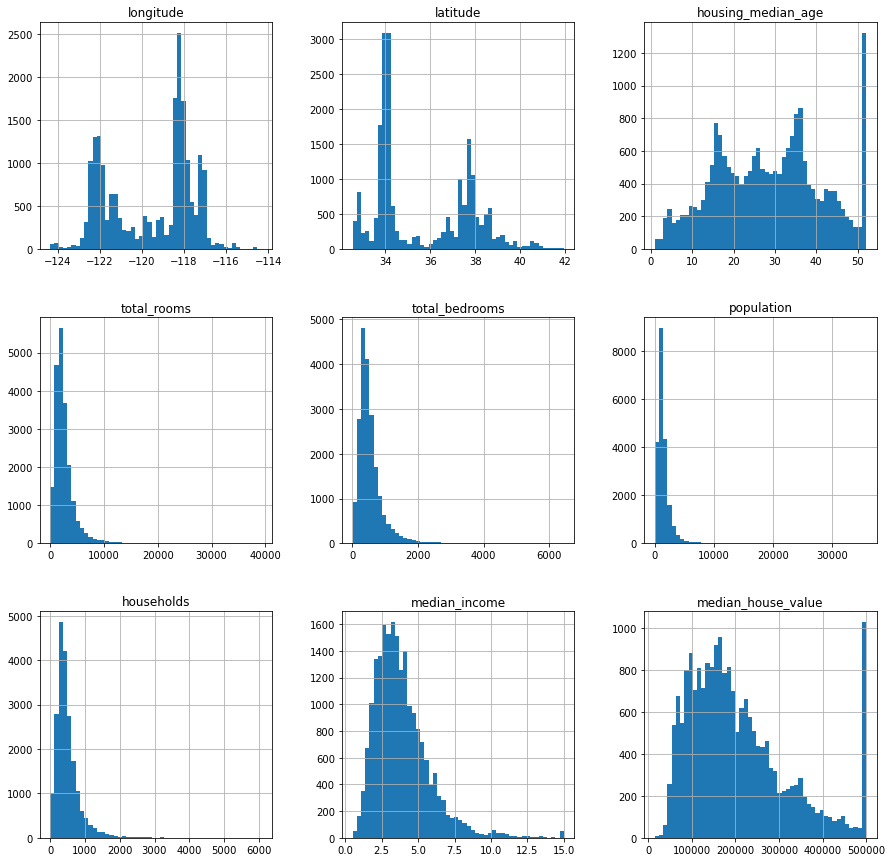

In [7]:
dataset.hist(bins=50, figsize=(15, 15))

In [8]:
X=dataset.drop(['median_house_value'],axis=1)
y=dataset['median_house_value']

In [9]:
def value_to_class(v):
    cls=0
    if v>=400000:
        cls=1
    elif v>=300000:
        cls=2
    elif v>=200000:
        cls=3
    elif v>=100000:
        cls=4
    else:
        cls=5
    return cls

In [10]:
dataset['median_house_class']=dataset['median_house_value'].apply(value_to_class)

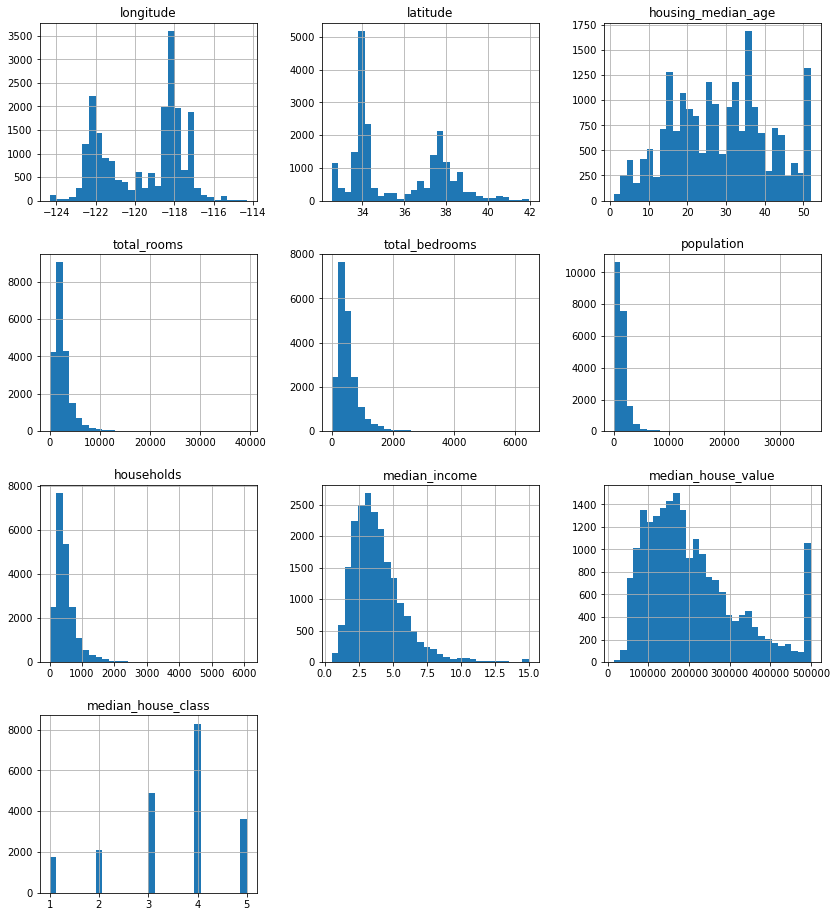

In [11]:
dataset.hist(bins=30,figsize = (14,16))
plt.show()

In [12]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le=LabelEncoder()
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])
ct = ColumnTransformer([("ocean_proximity",OneHotEncoder(), [8])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape

(16512, 12)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [18]:
model=Sequential()
model.add(Dense(12,input_dim=12))
model.add(Dense(1))

In [19]:
opt = keras.optimizers.Adam(learning_rate=0.2)
model.compile(optimizer = opt, loss = 'mean_absolute_error')

In [20]:
model.fit(X_train, y_train, batch_size = 160, epochs = 50)

Epoch 1/50
104/104 [==============================] - 0s 5ms/step - loss: 203811.1875
Epoch 2/50
104/104 [==============================] - 0s 4ms/step - loss: 180559.3281
Epoch 3/50
104/104 [==============================] - 0s 4ms/step - loss: 129631.7266
Epoch 4/50
104/104 [==============================] - 0s 4ms/step - loss: 68950.0859
Epoch 5/50
104/104 [==============================] - 0s 4ms/step - loss: 50122.5703
Epoch 6/50
104/104 [==============================] - 0s 4ms/step - loss: 48878.1523
Epoch 7/50
104/104 [==============================] - 0s 4ms/step - loss: 48643.3008
Epoch 8/50
104/104 [==============================] - 0s 4ms/step - loss: 48513.5000
Epoch 9/50
104/104 [==============================] - 0s 4ms/step - loss: 48422.0273
Epoch 10/50
104/104 [==============================] - 0s 4ms/step - loss: 48373.0156
Epoch 11/50
104/104 [==============================] - 0s 4ms/step - loss: 48391.1875
Epoch 12/50
104/104 [==============================] - 1s 5m

In [21]:
y_pred=model.predict(X_test)

In [22]:
y_test

16086    406200.0
8816     500001.0
7175     122900.0
16714    209100.0
14491    500001.0
           ...   
5817     260500.0
3127      68500.0
15957    246200.0
843      254400.0
1659     329400.0
Name: median_house_value, Length: 4128, dtype: float64

In [23]:
y_pred

array([[307776.72],
       [537154.75],
       [149946.27],
       ...,
       [241709.53],
       [243053.2 ],
       [334759.7 ]], dtype=float32)

In [24]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test.to_numpy(), y_pred)
# print("Accuracy = ",(cm[0,0]+cm[1,1])/(cm.sum()))